### 导入库

In [37]:
import tensorflow as tf
tf.__version__,tf.keras.__version__

('2.5.0-rc3', '2.5.0')

In [38]:
import numpy as np
import matplotlib.pyplot as plt

In [39]:
gpus=tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(gpus[0],True)

### 加载数据

In [40]:
mnist=tf.keras.datasets.mnist
(train_x,train_y),(test_x,test_y)=mnist.load_data()

In [41]:
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [42]:
type(train_x),type(train_y)

(numpy.ndarray, numpy.ndarray)

In [43]:
type(test_x),type(test_y)

(numpy.ndarray, numpy.ndarray)

### 数据预处理

In [44]:
X_train=train_x.reshape((60000,28*28))
X_test=test_x.reshape((10000,28*28))
#tf.keras.layers.Flatten()#将图片像素相乘，变成一维向量

In [45]:
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [46]:
X_train,X_test=tf.cast(train_x/255.0,tf.float32),tf.cast(test_x/255.0,tf.float32)#灰度值归一化
y_train,y_test=tf.cast(train_y,tf.int16),tf.cast(test_y,tf.int16)

In [47]:
X_train.shape,X_test.shape

(TensorShape([60000, 28, 28]), TensorShape([10000, 28, 28]))

In [48]:
type(X_train),type(y_train)

(tensorflow.python.framework.ops.EagerTensor,
 tensorflow.python.framework.ops.EagerTensor)

## 建立模型

In [49]:
model=tf.keras.Sequential()#建立Sequential模型
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))#说明输入为（28，28）的矩阵，将输入拉直，变成一维向量
model.add(tf.keras.layers.Dense(128,activation="relu"))#添隐含层（全连接层），节点为128，激活函数为relu
model.add(tf.keras.layers.Dense(10,activation="softmax"))#添加输出层（全连接层），节点为10，激活函数为softmax

In [50]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


## 配置训练方法

In [51]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['sparse_categorical_accuracy'])

## 训练模型

In [52]:
X_train.shape,X_test.shape

(TensorShape([60000, 28, 28]), TensorShape([10000, 28, 28]))

In [53]:
model.fit(X_train,y_train,batch_size=64,epochs=5,validation_split=0.2)

Epoch 1/5
750/750 [==============================] - 2s 3ms/step - loss: 0.3396 - sparse_categorical_accuracy: 0.9046 - val_loss: 0.1785 - val_sparse_categorical_accuracy: 0.9511
Epoch 2/5
750/750 [==============================] - 2s 3ms/step - loss: 0.1527 - sparse_categorical_accuracy: 0.9556 - val_loss: 0.1397 - val_sparse_categorical_accuracy: 0.9596
Epoch 3/5
750/750 [==============================] - 2s 3ms/step - loss: 0.1073 - sparse_categorical_accuracy: 0.9695 - val_loss: 0.1156 - val_sparse_categorical_accuracy: 0.9665
Epoch 4/5
750/750 [==============================] - 2s 3ms/step - loss: 0.0810 - sparse_categorical_accuracy: 0.9758 - val_loss: 0.1053 - val_sparse_categorical_accuracy: 0.9692
Epoch 5/5
750/750 [==============================] - 2s 3ms/step - loss: 0.0649 - sparse_categorical_accuracy: 0.9808 - val_loss: 0.0898 - val_sparse_categorical_accuracy: 0.9738


## 评估模型

In [54]:
model.evaluate(X_test,y_test,verbose=2)

313/313 - 0s - loss: 0.0851 - sparse_categorical_accuracy: 0.9746


[0.08506986498832703, 0.9746000170707703]

## 使用模型

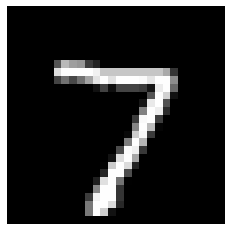

In [55]:
plt.axis("off")
plt.imshow(test_x[0],cmap="gray")
plt.show()

In [56]:
y_test[0]

<tf.Tensor: shape=(), dtype=int16, numpy=7>

In [58]:
X_test.shape

TensorShape([10000, 28, 28])

In [64]:
demo=tf.reshape(X_test[0],(1,28,28))
model.predict(demo)

array([[2.6500788e-06, 6.5813297e-09, 2.4675543e-05, 8.6650247e-04,
        1.3651770e-10, 8.4265810e-07, 1.1429603e-11, 9.9907565e-01,
        3.3002193e-06, 2.6405043e-05]], dtype=float32)

In [68]:
#demo=tf.reshape(X_test[0],(1,28,28))
np.argmax(model.predict(demo))

7

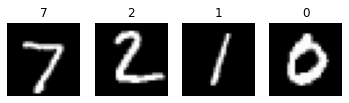

In [69]:
for i in range(4):
    
    plt.subplot(1,4,i+1)
    plt.axis("off")
    plt.imshow(test_x[i],cmap='gray')
    plt.title(test_y[i])
    
plt.show()

In [70]:
model.predict(X_test[0:4])

array([[2.6500738e-06, 6.5813297e-09, 2.4675519e-05, 8.6650212e-04,
        1.3651770e-10, 8.4265730e-07, 1.1429603e-11, 9.9907565e-01,
        3.3002161e-06, 2.6405043e-05],
       [4.4528110e-07, 5.2090449e-04, 9.9936157e-01, 7.6923963e-05,
        1.4275081e-12, 1.0538237e-05, 5.5016983e-07, 4.3261096e-11,
        2.9044382e-05, 5.0876148e-10],
       [1.9410008e-05, 9.9453342e-01, 6.5891678e-04, 8.7323184e-05,
        2.3319491e-04, 9.6083626e-05, 4.2941061e-05, 3.6915031e-03,
        5.9121527e-04, 4.6033070e-05],
       [9.9996281e-01, 1.5904797e-08, 2.2565700e-05, 3.4373355e-07,
        1.0424833e-08, 3.1154920e-07, 4.2131364e-06, 9.7701140e-06,
        2.1619119e-08, 2.9657793e-08]], dtype=float32)

In [72]:
np.argmax(model.predict(X_test[0:4]),axis=1)

array([7, 2, 1, 0], dtype=int64)

In [73]:
y_pred=np.argmax(model.predict(X_test[0:4]),axis=1)

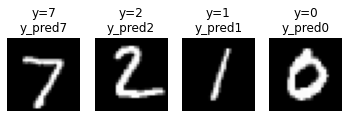

In [74]:
for i in range(4):
    
    plt.subplot(1,4,i+1)
    plt.axis("off")
    plt.imshow(test_x[i],cmap='gray')
    plt.title("y="+str(test_y[i])+"\ny_pred"+str(y_pred[i]))
    
plt.show()

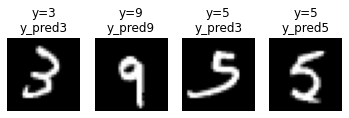

In [85]:
for i in range(4):
    num=np.random.randint(1,10000)
    
    plt.subplot(1,4,i+1)
    plt.axis("off")
    plt.imshow(test_x[num],cmap='gray')
    demo=tf.reshape(X_test[num],(1,28,28))
    y_pred=np.argmax(model.predict(demo))
    #y_pred=np.argmax(model.predict([[X_test[num]]]))
    title="y="+str(test_y[num])+"\ny_pred"+str(y_pred)
    plt.title(title)
    
plt.show()